In [34]:
from IPython.display import Latex

# Certificate in Quantitative Finance. Module 3.

Malygin Vladimir <br>
April 2020


## 1. Underlying Stock Price Simulations
### 1.1. Euler-Maruyama Scheme for Simulatung the Underlying Stock Srice
The underlying stock price follows Geometric Brownian Motion (GBM)
<br>
<br>
\begin{eqnarray}
 \mathrm{d}S_{t} = rS_{t}\mathrm{dt}\text{ + } \sigma S_{t}\mathrm{dW_{t}} \quad  (1),
\end{eqnarray} 
<br> 
<br> 
where $S_{t}$ is a price at moment $t$, $r$ is a constant risk-free rate, $\sigma$ is constant volatility of an underlying stock.<br>
As it was shown in the lecture notes, for the GBM **Euler-Maruyama** gives the solution to (1) in a convinient time-stepping form: <br> <br>
\begin{eqnarray}
 S_{t+\delta t} = S_{t}(1+r\delta t + \sigma \phi\sqrt{\delta t})\quad (2),
\end{eqnarray}
<br> 
where $\delta t$ is a descrete time-step and $\phi$ is a standart normal variable.
<br> We have the following set of sample data to perform computations:
<br>
<br> <center> Today's stock price $S_{0} = 100$ </center>
<br> <center> Strike $E = 100$ </center>
<br> <center> Time to expiry $\text{}$ $T-t$ $= \text{1 year}$ </center>
<br> <center> Volatility $\sigma = 20\text{%}$ </center>
<br> <center> Constant risk-free interest rate $r = 5\text{%}$ </center>

### 1.2 Outline of the numeric procedure
This section explains the outline of a numerical procedure used to simulate a stock price. Besides the parameters introduced above, several others are added. We simulate $N = 1000$ stock paths. We set up a default time-step $\delta t = \frac{1}{1000}$. Later in the assignment, we vary these parameters to see the contribution in the error term. The procedure for generating a stock price is implemented as the Python 3 code. 

The sequence of computations are the following.
First of all, we define a starting point $S_{i, 0}$ for all stock price paths.
Then, for each day we simulate a stock price according to GBM as described in (2). At the end of a single simulation, we receive a complete stock price path for a stock price $i$. The path of the price $i$ ends at $S_{i,T}$. The procedure is repeated e $N$ times.

In [207]:
# import necessary packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from scipy.stats import norm

# set up the set of sample data

S0 = 100.0 # today's stock price
E = 100.0 # strike
sigma = 0.20 # volatility
rf = 0.05 # risk-free rate
T = 1.0 # T-t is 1 year time to expiry
dt = T/1000 # 1 day is a time-step
N = 1000 # number of paths

Perform a stock price simultion and store the results.

In [208]:
np.random.seed(2020) # let's define a seed to make it possible to retrieve a solution
paths = [] # create an empty list to store price paths
for i in range(N):
    path = [] # create an empty list to store price values for every t per a path
    s_t = S0 # set up a starting point today's price
    path.append(s_t) # append the starting point price
    for j in range(1, int(1/dt)):
        phi = np.random.normal(0,1) # generate standart normal random variable
        s_t= s_t + s_t*rf*dt + s_t*sigma*phi*np.sqrt(dt) # get GBM price at t
        path.append(s_t) # add an observation to a price path
    paths.append(path) # add path to the collection of price paths

Let's plot simulated stock price's paths

Text(0.5, 1.0, 'The Monte Carlo Simulation of a Stock Price (GBM)')

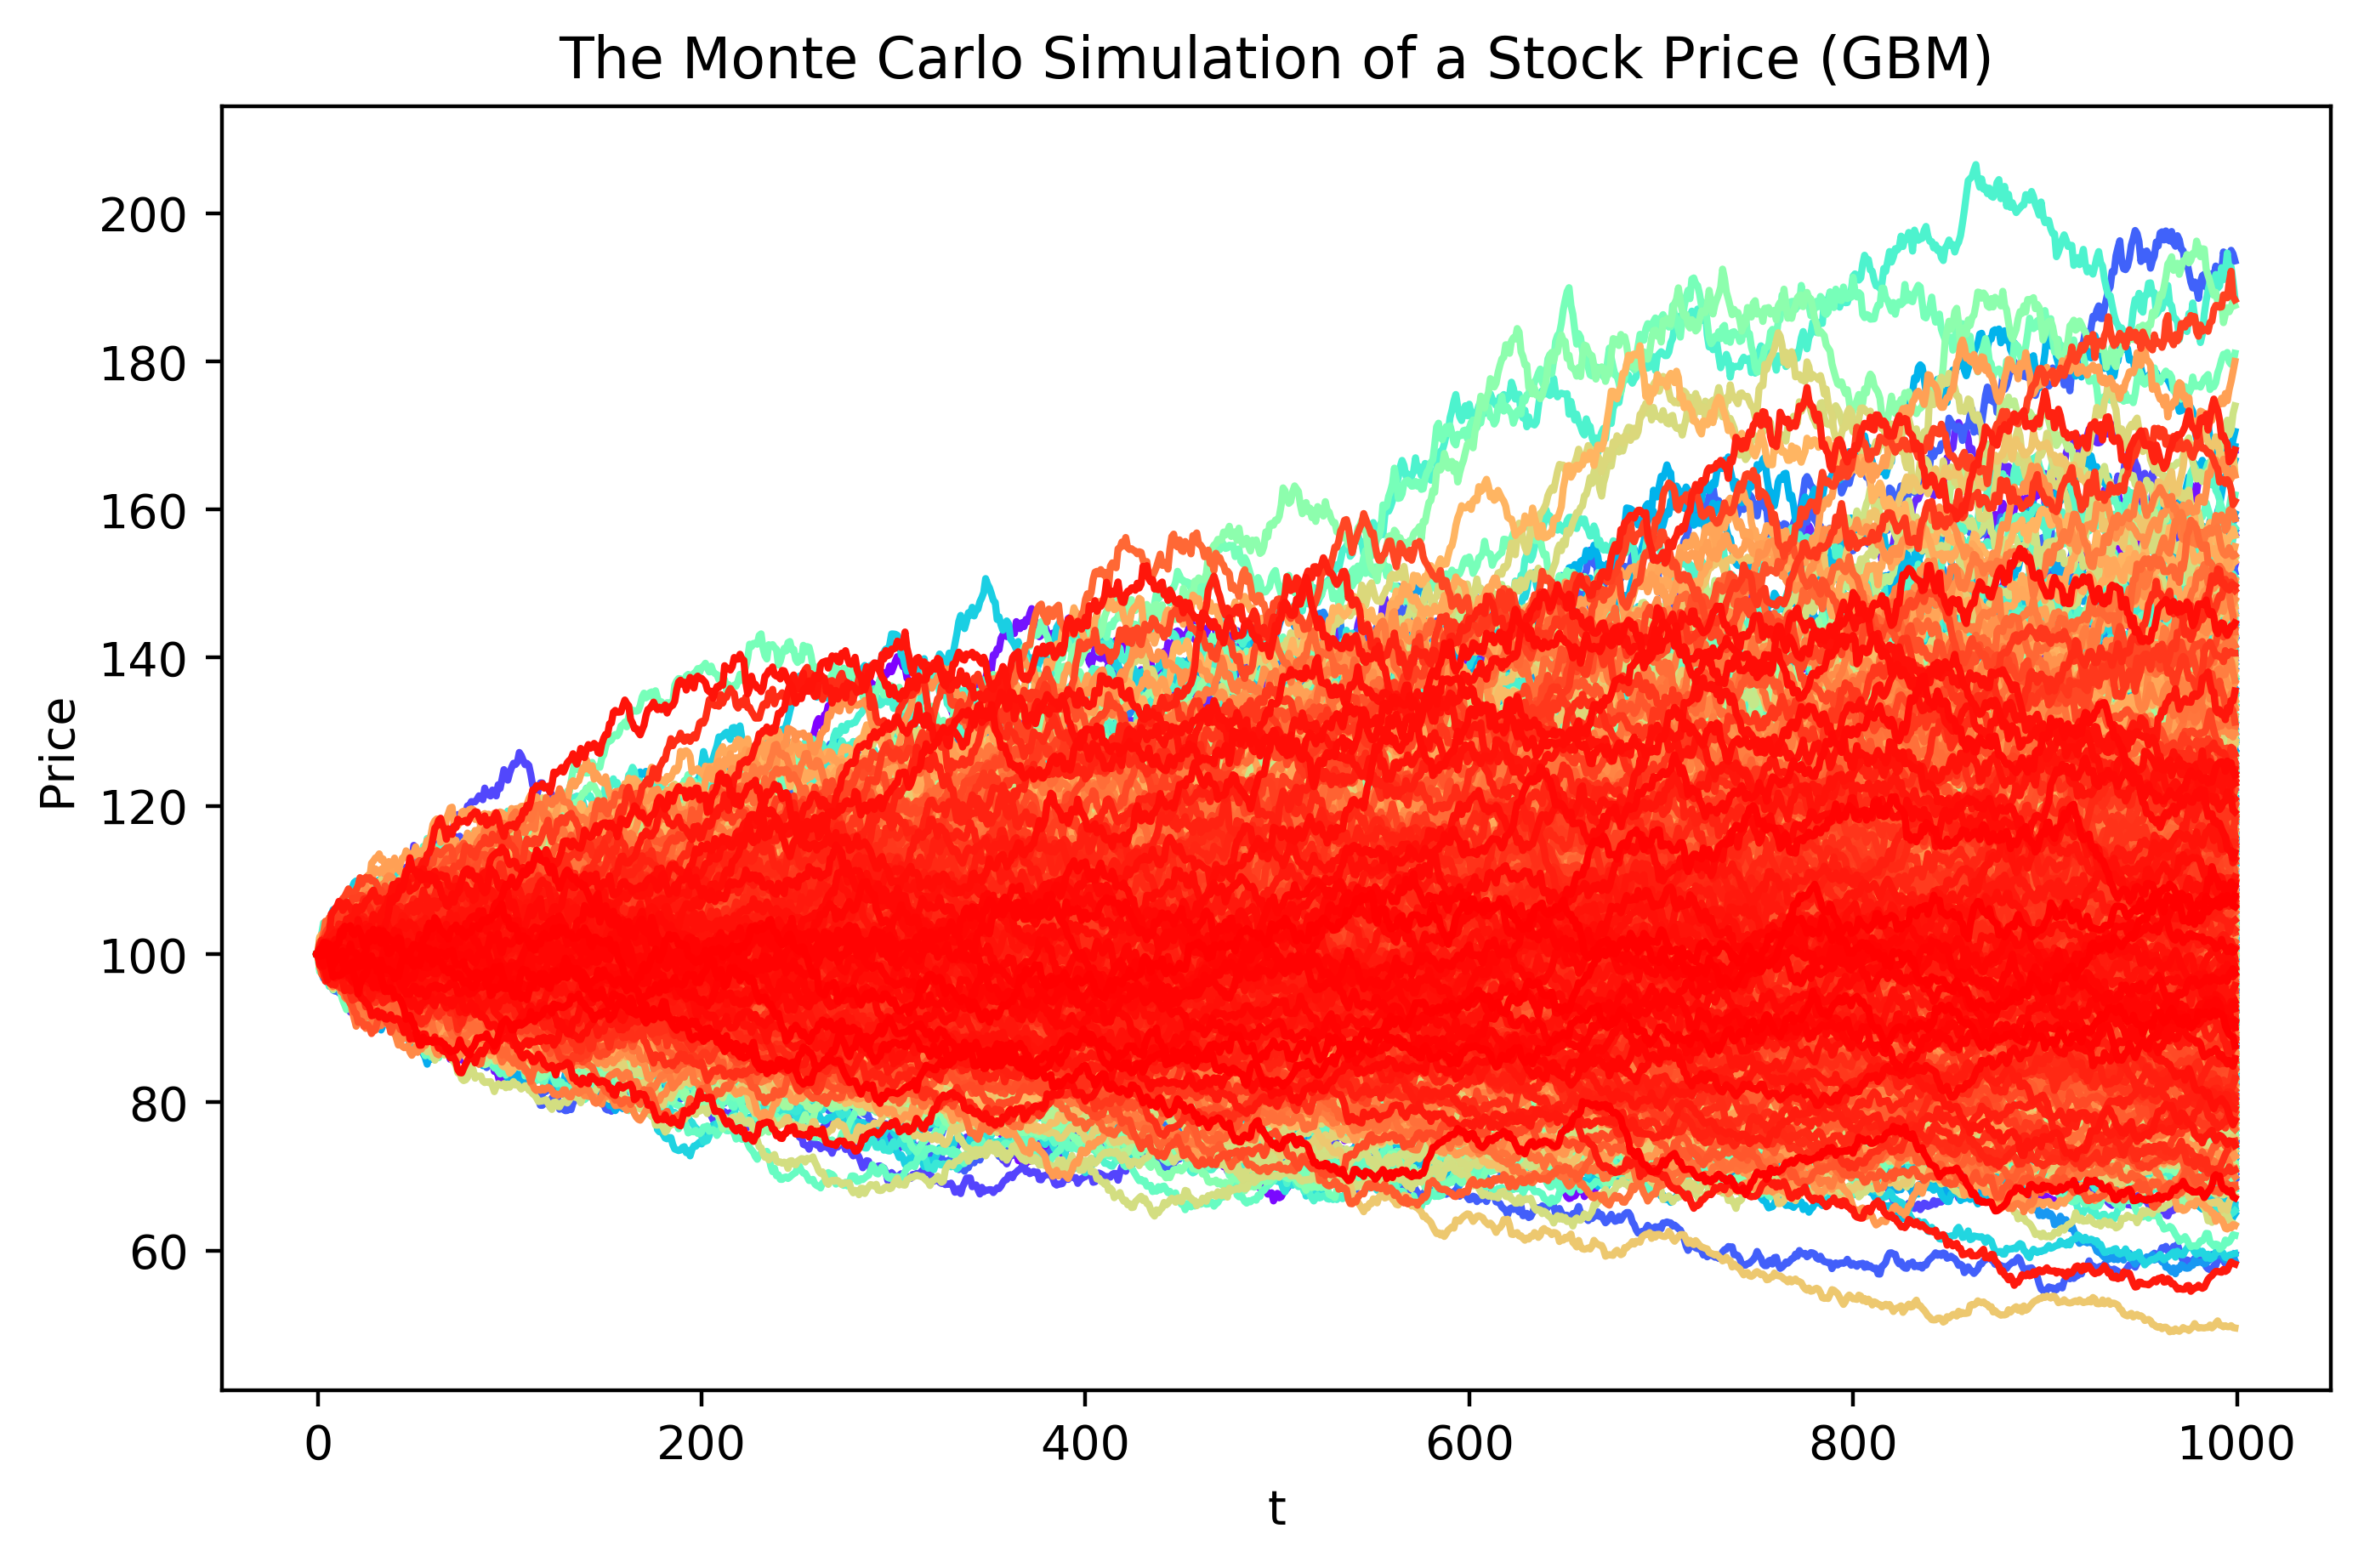

In [209]:
plt.figure(num=None, figsize=(8, 5), dpi = 300, facecolor = 'w', edgecolor = 'k')
color = cm.rainbow(np.linspace(0,1, N))
for k, c in zip(range(N), color):
    path = pd.DataFrame(paths[k])
    plt.plot(path, c = c)
plt.xlabel('t')
plt.ylabel('Price')
plt.title('The Monte Carlo Simulation of a Stock Price (GBM)')

## 2. Binary Option Pricing

### 2.1. Option Price as the Expected Value of a Discounted Payoff

In general, an option price can be defined as the expected value of the discounted payoff under the risk-neutral density $\mathbb{Q}$

\begin{eqnarray}
 V(S,t) = \rm{e}^{-r(T-t)}\mathbb{E}^{\mathbb{Q}}[Payoff(S_{T})]\qquad\text{(3)},
\end{eqnarray} <br>

for the appropriate form of payoffs. Some of possible payoff structures are descriped below.

### 2.2. Payoff Structures

Let's define various payoff structures for a binary option. <br>

The **payoff** structure of the cash-or-nothing (CoN) binary call option can be written by using Heaviside function: <br> <br>
\begin{eqnarray} 
 P_{call}^{CoN}(S,T) = \mathcal{H}(S-E) = 
  \begin{cases}
    1 & \ \text{if } S(T) \geq E\\
    0  & \ \text{otherwise}\qquad\text{(4)}
  \end{cases}
\end{eqnarray} <br>

The **payoff** structure of the CoN binary put option is <br> <br>
\begin{eqnarray}
 P_{put}^{CoN}(S,T) = \mathcal{H}(E-S) = 
  \begin{cases}
    1 & \ \text{if } E \geq  S(T)\\
    0  & \ \text{otherwise}\qquad\text{(5)}
  \end{cases}
\end{eqnarray} <br>

The **payoff** structure of the asset-or-nothing (AoN) binary call option can be written by using Heaviside function: <br> <br>
\begin{eqnarray} 
 P_{call}^{AoN}(S,T) = \mathcal{H}(S-E) = 
  \begin{cases}
    S(T) & \ \text{if } S(T) \geq E\\
    0  & \ \text{otherwise}\qquad\text{(6)}
  \end{cases}
\end{eqnarray} <br>

The **payoff** structure of the AoN binary put option can be written by using Heaviside function: <br> <br>
\begin{eqnarray} 
 P_{put}^{AoN}(S,T) = \mathcal{H}(E-S) = 
  \begin{cases}
    S(T) & \ \text{if }  E \geq S(T)\\
    0  & \ \text{otherwise}\qquad\text{(7)}
  \end{cases}
\end{eqnarray} <br>

Let's define cash-or-nothing payoff structures for call and put options in terms of Python 3 functions. These functions compute a payoff at expiration date, so they take as arguments a price at expiry *S_T*, a strike price *E* and payoff amount *payoffAmount*.

In [210]:
def cashBinaryCallPayoff(S_T, E, payoffAmount = 1): # this is a Heaviside function for a binary call option
    if(S_T >= E):
        payoff = payoffAmount
    else:
        payoff = 0
    return(payoff)

def cashBinaryPutPayoff(S_T, E, payoffAmount = 1): # this is a Heaviside function for a binary put option
    if(S_T <= E):
        payoff = payoffAmount
    else:
        payoff = 0
    return(payoff)

def assetBinaryCallPayoff(S_T, E, payoffAmount): # this is a Heaviside function for a binary call option
    if(S_T >= E):
        payoff = payoffAmount
    else:
        payoff = 0
    return(payoff)

def assetBinaryPutPayoff(S_T, E, payoffAmount): # this is a Heaviside function for a binary put option
    if(S_T <= E):
        payoff = payoffAmount
    else:
        payoff = 0
    return(payoff)

### 2.3. The Estimation of Binary Call and Put Option Prices for Various Payoff Structures

Let's describe the Monte Carlo method to compute digital call and put option prices. The technique can be performed as follows. Firstly, we generate $N$ stock price paths (we vary this parameter) and compute a discounted payoff for each sample-path. Secondly, we take the average of all payoffs within one repetition and store the calculated option price. We repeat this exercise multiple times (we perform 10, 100, 1000 repetitions) and take the average across all option values. As stated above, we also look at what if we change the number of time-steps.
<br> 
Below, I create a function to compute the option prices for payoff structures from section 2.2. The code is well-documented, which makes it almost syntax-independent. The function takes a few arguments as input. We can set up the number of repetitions as *nrOfRepetions*, the number of generated price paths as *nrOfPaths*, a risk-free rate *rf*, volatility *sigma*, and a time-step *dt*.

In [2]:
def computeBinary(nrOfRepetitions, nrOfPaths, rf, sigma, dt):
    
    call_CoN_per_rep = 0 # we will accumulute option prices in this variable to take the average in the end
    put_CoN_per_rep = 0 # we will accumulute option prices in this variable to take the average in the end
    call_AoN_per_rep = 0 # we will accumulute option prices in this variable to take the average in the end
    put_AoN_per_rep = 0 # we will accumulute option prices in this variable to take the average in the end
    for m in range(nrOfRepetitions): # here m is iterator across repetitions
        disc_payoffs_call_CoN = 0 # create a numerical variable to accumulate discounted payoffs per path
        disc_payoffs_put_CoN = 0 # create a numerical variable to accumulate discounted payoffs per path
        disc_payoffs_call_AoN = 0 # create a numerical variable to accumulate discounted payoffs per path
        disc_payoffs_put_AoN = 0 # create a numerical variable to accumulate discounted payoffs per path
        for i in range(nrOfPaths): 
            path = [] # create an empty list to store price values for every t per a path
            s_t = S0 # set up a starting point today's price
            path.append(s_t) # append the prices to a path
            disc_payoff_call_CoN = 0 # in the beginning of every stock path, set payoff = 0
            disc_payoff_put_CoN = 0  # in the beginning of every stock path, set payoff = 0
            disc_payoff_call_AoN = 0 # in the beginning of every stock path, set payoff = 0
            disc_payoff_put_AoN = 0 #  in the beginning of every stock path, set payoff = 0
            for j in range(int(1/dt)):
                phi = np.random.normal(0,1) # generate standart normal random variable
                s_t= s_t + s_t*rf*dt + s_t*sigma*phi*np.sqrt(dt) # compute GBM price at t
                path.append(s_t) # add an observation to a price path
            disc_payoff_call_CoN = np.exp(-rf*T)*cashBinaryCallPayoff(s_t, E, 1) # compute a discounted payoff per path
            disc_payoffs_call_CoN += disc_payoff_call_CoN # sum payoffs rece
            disc_payoff_put_CoN = np.exp(-rf*T)*cashBinaryPutPayoff(s_t, E, 1) # compute a discounted payoff per path
            disc_payoffs_put_CoN += disc_payoff_put_CoN # sum payoffs rece
            disc_payoff_call_AoN = np.exp(-rf*T)*assetBinaryCallPayoff(s_t, E, s_t) # compute a discounted payoff per path
            disc_payoffs_call_AoN += disc_payoff_call_AoN # sum payoffs rece
            disc_payoff_put_AoN = np.exp(-rf*T)*assetBinaryPutPayoff(s_t, E, s_t) # compute a discounted payoff per path
            disc_payoffs_put_AoN += disc_payoff_put_AoN # sum payoffs rece
        call_CoN_per_rep += disc_payoffs_call_CoN/nrOfPaths  # add option price to the collection of option prices
        put_CoN_per_rep += disc_payoffs_put_CoN/nrOfPaths # add option price to the collection of option prices
        call_AoN_per_rep += disc_payoffs_call_AoN/nrOfPaths  # add option price to the collection of option prices
        put_AoN_per_rep += disc_payoffs_put_AoN/nrOfPaths # add option price to the collection of option prices
    call_CoN_final = call_CoN_per_rep/nrOfRepetitions # take the average of option prices computed in nrOfRepetitions
    put_CoN_final = put_CoN_per_rep/nrOfRepetitions # take the average of option prices computed in nrOfRepetitions
    call_AoN_final = call_AoN_per_rep/nrOfRepetitions # take the average of option prices computed in nrOfRepetitions
    put_AoN_final = put_AoN_per_rep/nrOfRepetitions # take the average of option prices computed in nrOfRepetitions
    return(call_CoN_final, put_CoN_final, call_AoN_final, put_AoN_final)

### 2.4. Binary Option Prices from Black-Scholes-Merton Framework

Before we perform the empirical study, let's define the reference prices. We will use prices obtained from the BSM framework as the reference. The formulas to compute the price of binary call and put options for payoff structures are described in section 2.2. Please note that since the dividend rate is equal to 0 in this assignment, we do not discount binary options prices with the asset-or-nothing payoff structure.

\begin{eqnarray} 
 C_{b}^{CoN} = \rm{e}^{-rT} \Phi(d_{2}) \qquad\text{(8)}
\end{eqnarray} <br>

\begin{eqnarray} 
 P_{b}^{CoN} = \rm{e}^{-rT} \Phi(-d_{2}) \qquad\text{(9)}
\end{eqnarray} <br>

\begin{eqnarray} 
 C_{b}^{AoN} = \Phi(d_{1}) \qquad\text{(10)}
\end{eqnarray} <br>

\begin{eqnarray} 
 P_{b}^{AoN} = \Phi(-d_{1}) \qquad\text{(11)}
\end{eqnarray} <br>

\begin{eqnarray} 
 d_{1} = \frac{log(\frac{S}{E})+r+\frac{1}{2}\sigma^{2}(T-t)}{\sqrt{T-t}} \qquad\text{(12)}
\end{eqnarray} <br>

\begin{eqnarray} 
 d_{2} = d_1-\sigma{\sqrt{T-t}} \qquad\text{(13)}
\end{eqnarray} <br> 

\begin{eqnarray} 
 \Phi(\mathrm{x}) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^x\mathrm{e}^{-\frac{1}{2}\phi^{2}}\,\mathrm{d}\phi \qquad\text{(14)}
\end{eqnarray} <br> 

Let's also write down the Python 3 function to compute $d_{1}$.

In [696]:
def compute_d1(S0, E, rf, sigma, T_t):
    
    d1 = (np.log(S0/E) + (rf + 1/2*sigma**2)*T_t)/(sigma*np.sqrt(T_t))
    return(d1)

### 2.5. The Computations of Binary Option Prices Using MC Method and BSM Framework

#### 2.5.1. The computations Binary Option Prices Using BSM

We prepared all necessary elements to perform a complete analysis. Let's compute the option prices according to BSM.

In [414]:
d1 = compute_d1(S0=S0, E=E, rf=rf, sigma=sigma, T_t=T)
d2 = d1 - sigma*np.sqrt(T)
BSMcallCoN = np.exp(-rf*T)*norm.cdf(d2)
BSMputCoN = np.exp(-rf*T)*norm.cdf(-d2)
BSMcallAoN = S0*norm.cdf(d1)
BSMputAoN = S0*norm.cdf(-d1)

In [415]:
print('Binary Call Option with Cash-or-Nothing Payoff Structure is '+ str(round(BSMcallCoN, 6)))

Binary Call Option with Cash-or-Nothing Payoff Structure is 0.532325


In [416]:
print('Binary Put Option with Cash-or-Nothing Payoff Structure is '+ str(round(BSMputCoN, 6)))

Binary Put Option with Cash-or-Nothing Payoff Structure is 0.418905


In [417]:
print('Binary Call Option with Asset-or-Nothing Payoff Structure is '+ str(round(BSMcallAoN, 6)))

Binary Call Option with Asset-or-Nothing Payoff Structure is 63.683065


In [418]:
print('Binary Put Option with Asset-or-Nothing Payoff Structure is '+ str(round(BSMputAoN, 6)))

Binary Put Option with Asset-or-Nothing Payoff Structure is 36.316935


#### 2.5.2. The Computations of Binary Option Prices Using MC Method

This section computes binary options prices using the MC method and verifies them using the results from Section 2.5.1. Below, we run several specifications with various parameters. In particular, we vary the timestep frequency, the number of simulations, and the number of repetitions to show the development of the error for the change in parameters.

First of all, we set up default parameters such as the number of paths generated $N = 1000$, the number of repetitions $M = 1$. We vary the time-step $\delta t=\{\frac{1}{10}, \frac{1}{100}, \frac{1}{1000}\}$.

In [476]:
time_steps = [1/10, 1/100, 1/1000, 1/10000]
N = 1000
M = 1
optionPrices_dt = []

for dt in time_steps:
    prices = computeBinary(nrOfRepetitions = M, nrOfPaths = N, rf = rf, sigma = sigma, dt = dt)
    optionPrices_dt.append(prices)
    
optionPrices_dt = pd.DataFrame(optionPrices_dt, columns=['Call Price MC CoN', 
                                                         'Put Price MC CoN', 
                                                         'Call Price MC AoN', 
                                                         'Put Price MC AoN'])

optionPrices_dt['Call Price BS CoN'] = np.repeat(BSMcallCoN, 4)
optionPrices_dt['Put Price BS CoN'] = np.repeat(BSMputCoN, 4)
optionPrices_dt['Call Price BS AoN'] = np.repeat(BSMcallAoN, 4)
optionPrices_dt['Put Price BS AoN'] = np.repeat(BSMputAoN, 4)

In [678]:
optionPrices_dt['Call Price CoN MC-BS % Difference'] = (optionPrices_dt['Call Price MC CoN'] \
                                                        - optionPrices_dt['Call Price BS CoN'])*100 \
                                                        / optionPrices_dt['Call Price BS CoN']

optionPrices_dt['Put Price CoN MC-BS % Difference'] =(optionPrices_dt['Put Price MC CoN'] \
                                                        - optionPrices_dt['Put Price BS CoN'])*100 \
                                                        / optionPrices_dt['Put Price BS CoN']

optionPrices_dt['Call Price AoN MC-BS % Difference'] =(optionPrices_dt['Call Price MC AoN'] \
                                                        - optionPrices_dt['Call Price BS AoN'])*100 \
                                                        / optionPrices_dt['Call Price BS AoN']

optionPrices_dt['Put Price AoN MC-BS % Difference'] =(optionPrices_dt['Put Price MC AoN'] \
                                                        - optionPrices_dt['Put Price BS AoN'])*100 \
                                                        / optionPrices_dt['Put Price BS AoN']

In [679]:
optionPrices_dt = pd.concat([optionPrices_dt, pd.DataFrame(time_steps)], axis = 1)
optionPrices_dt = optionPrices_dt.rename(columns={0: 'Time-step'})

**Table 1** - Binary Option Prices. $N = 1000$, $M = 1$, $\delta t=\{\frac{1}{10}, \frac{1}{100}, \frac{1}{1000}\}$

In [680]:
optionPrices_dt

,Call Price MC CoN,Put Price MC CoN,Call Price MC AoN,Put Price MC AoN,Call Price BS CoN,Put Price BS CoN,Call Price BS AoN,Put Price BS AoN,Call Price CoN MC-BS % Difference,Put Price CoN MC-BS % Difference,Call Price AoN MC-BS % Difference,Put Price AoN MC-BS % Difference,Time-step
0,0.528884,0.422346,63.068004,36.325360,0.532325,0.418905,63.683065,36.316935,-0.646458,0.821489,-0.965816,0.023200,0.1000
1,0.532688,0.418541,63.318124,36.260059,0.532325,0.418905,63.683065,36.316935,0.068316,-0.086813,-0.573058,-0.156611,0.0100
2,0.540298,0.410931,65.565783,35.656295,0.532325,0.418905,63.683065,36.316935,1.497863,-1.903416,2.956387,-1.819095,0.0010
3,0.538396,0.412834,64.742621,35.780020,0.532325,0.418905,63.683065,36.316935,1.140476,-1.449265,1.663796,-1.478414,0.0001


From table 1, we see that the prices computed using the MC method are not quite different from ones computed using the BSM framework. Further, we know that there two sources of error in MC method $\mathcal{O}{(\delta t)}$ and $\mathcal{O}{(N^{\mathcal-\frac{1}{2}})}$. We know that the calculations' precision is limited by contributing to the error term from the number of simulations. Indeed, from **Table 1**, we see that the order of error indeed matches the order of, which is coming from the number of simulations despite a high number of time-steps.

Now, let's perform a little bit different experiment. We will vary the number of simulations given the fixed time-step. So, the number of repetitions is $M = 1$, the number of simulation $N =\{10, 100, 1000\}$, the fixed time-step $\delta t=\frac{1}{1000}$.

In [479]:
dt = 1/1000
N = [10, 100, 1000, 10000]
M = 1
optionPrices_N = []

for n in N:
    prices = computeBinary(nrOfRepetitions = M, nrOfPaths = n, rf = rf, sigma = sigma, dt = dt)
    optionPrices_N.append(prices)
    
optionPrices_N = pd.DataFrame(optionPrices_N, columns=['Call Price MC CoN', 
                                                         'Put Price MC CoN', 
                                                         'Call Price MC AoN', 
                                                         'Put Price MC AoN'])

In [681]:
optionPrices_N['Call Price BS CoN'] = np.repeat(BSMcallCoN, 4)
optionPrices_N['Put Price BS CoN'] = np.repeat(BSMputCoN, 4)
optionPrices_N['Call Price BS AoN'] = np.repeat(BSMcallAoN, 4)
optionPrices_N['Put Price BS AoN'] = np.repeat(BSMputAoN, 4)

In [697]:
optionPrices_N['Call Price CoN MC-BS % Difference'] =   round((optionPrices_N['Call Price MC CoN'] \
                                                        - optionPrices_N['Call Price BS CoN'])*100 \
                                                        / optionPrices_N['Call Price BS CoN'], 3)

optionPrices_N['Put Price CoN MC-BS % Difference'] =   round((optionPrices_N['Put Price MC CoN'] \
                                                        - optionPrices_N['Put Price BS CoN'])*100 \
                                                        / optionPrices_N['Put Price BS CoN'], 3)

optionPrices_N['Call Price AoN MC-BS % Difference'] =  round(((optionPrices_N['Call Price MC AoN'] \
                                                        - optionPrices_N['Call Price BS AoN'])*100 \
                                                        / optionPrices_N['Call Price BS AoN']), 3)

optionPrices_N['Put Price AoN MC-BS % Difference'] =   round(((optionPrices_N['Put Price MC AoN'] \
                                                        - optionPrices_N['Put Price BS AoN'])*100 \
                                                        / optionPrices_N['Put Price BS AoN']), 3)

In [ ]:
optionPrices_N = pd.concat([optionPrices_N, pd.DataFrame(N)], axis = 1)
optionPrices_N = optionPrices_N.rename(columns={0: "Simulations"})

**Table 2** - Binary Option Prices. $M = 1$, $N =\{10, 100, 1000\}$, $\delta t=\frac{1}{1000}$.

In [698]:
optionPrices_N

,Call Price MC CoN,Put Price MC CoN,Call Price MC AoN,Put Price MC AoN,Call Price BS CoN,Put Price BS CoN,Call Price BS AoN,Put Price BS AoN,Call Price CoN MC-BS % Difference,Put Price CoN MC-BS % Difference,Call Price AoN MC-BS % Difference,Put Price AoN MC-BS % Difference,Simulations
0,0.380492,0.570738,40.701424,48.382300,0.532325,0.418905,63.683065,36.316935,-28.523,36.245,-36.088,33.222,10
1,0.561225,0.390004,66.295314,33.051495,0.532325,0.418905,63.683065,36.316935,5.429,-6.899,4.102,-8.992,100
2,0.516518,0.434712,61.883277,37.767812,0.532325,0.418905,63.683065,36.316935,-2.969,3.773,-2.826,3.995,1000
3,0.530120,0.421109,63.442808,36.467278,0.532325,0.418905,63.683065,36.316935,-0.414,0.526,-0.377,0.414,10000


Here we see how big the error when the number of simulations is low (10). When we increase the number of simulations, the error converges to the limit.<br><br>
Let's achieve a considerable difference in terms of precision. We fix the number of simulations at the level of $N=1000$ and fix the time-step granularity up to $\delta t=\frac{1}{1000}$. However, we vary the number of repetition $M=\{1, 10, 100, 1000\}.$

In [672]:
dt = 1/1000
N = 1000
M = [1, 10, 100, 1000]
optionPrices_M = []

for m in M:
    prices = computeBinary(nrOfRepetitions = m, nrOfPaths = N, rf = rf, sigma = sigma, dt = dt)
    optionPrices_M.append(prices)
    
optionPrices_M = pd.DataFrame(optionPrices_M, columns=['Call Price MC CoN', 
                                                         'Put Price MC CoN', 
                                                         'Call Price MC AoN', 
                                                         'Put Price MC AoN'])

optionPrices_M['Call Price BS CoN'] = np.repeat(BSMcallCoN, 4)
optionPrices_M['Put Price BS CoN'] = np.repeat(BSMputCoN, 4)
optionPrices_M['Call Price BS AoN'] = np.repeat(BSMcallAoN, 4)
optionPrices_M['Put Price BS AoN'] = np.repeat(BSMputAoN, 4)

In [674]:
optionPrices_M['Call Price CoN MC-BS % Difference'] = round(((optionPrices_M['Call Price MC CoN'] \
                                                        - optionPrices_M['Call Price BS CoN'])*100 \
                                                        / optionPrices_M['Call Price BS CoN']), 2)

optionPrices_M['Put Price CoN MC-BS % Difference'] = round(((optionPrices_M['Put Price MC CoN'] \
                                                        - optionPrices_M['Put Price BS CoN'])*100 \
                                                        / optionPrices_M['Put Price BS CoN']), 2)

optionPrices_M['Call Price AoN MC-BS % Difference'] = round(((optionPrices_M['Call Price MC AoN'] \
                                                        - optionPrices_M['Call Price BS AoN'])*100 \
                                                        / optionPrices_M['Call Price BS AoN']), 2)

optionPrices_M['Put Price AoN MC-BS % Difference'] = round(((optionPrices_M['Put Price MC AoN'] \
                                                        - optionPrices_M['Put Price BS AoN'])*100 \
                                                        / optionPrices_M['Put Price BS AoN']), 2)

In [675]:
optionPrices_M = pd.concat([optionPrices_M, pd.DataFrame(M)], axis = 1)
optionPrices_M = optionPrices_M.rename(columns={0: "Repetitions"})

**Table 3** - Binary Option Prices. $N = 1$, $M =\{1, 10, 100, 1000\}$, $\delta t=\frac{1}{1000}$.

In [676]:
optionPrices_M

,Call Price MC CoN,Put Price MC CoN,Call Price MC AoN,Put Price MC AoN,Call Price BS CoN,Put Price BS CoN,Call Price BS AoN,Put Price BS AoN,Call Price CoN MC-BS % Difference,Put Price CoN MC-BS % Difference,Call Price AoN MC-BS % Difference,Put Price AoN MC-BS % Difference,Repetitions
0,0.550762,0.400468,65.829850,34.734026,0.532325,0.418905,63.683065,36.316935,3.46,-4.40,3.37,-4.36,1
1,0.537635,0.413595,64.223879,35.861462,0.532325,0.418905,63.683065,36.316935,1.00,-1.27,0.85,-1.25,10
2,0.532365,0.418864,63.688520,36.319166,0.532325,0.418905,63.683065,36.316935,0.01,-0.01,0.01,0.01,100
3,0.532486,0.418744,63.707577,36.298188,0.532325,0.418905,63.683065,36.316935,0.03,-0.04,0.04,-0.05,1000


From table 3, we see the reduction in the error is significant. This is what we expected by increasing the number of repetitions, so we reduced the order of the error, which limited us in previous experiments. Let's make a plot to see the convergence.

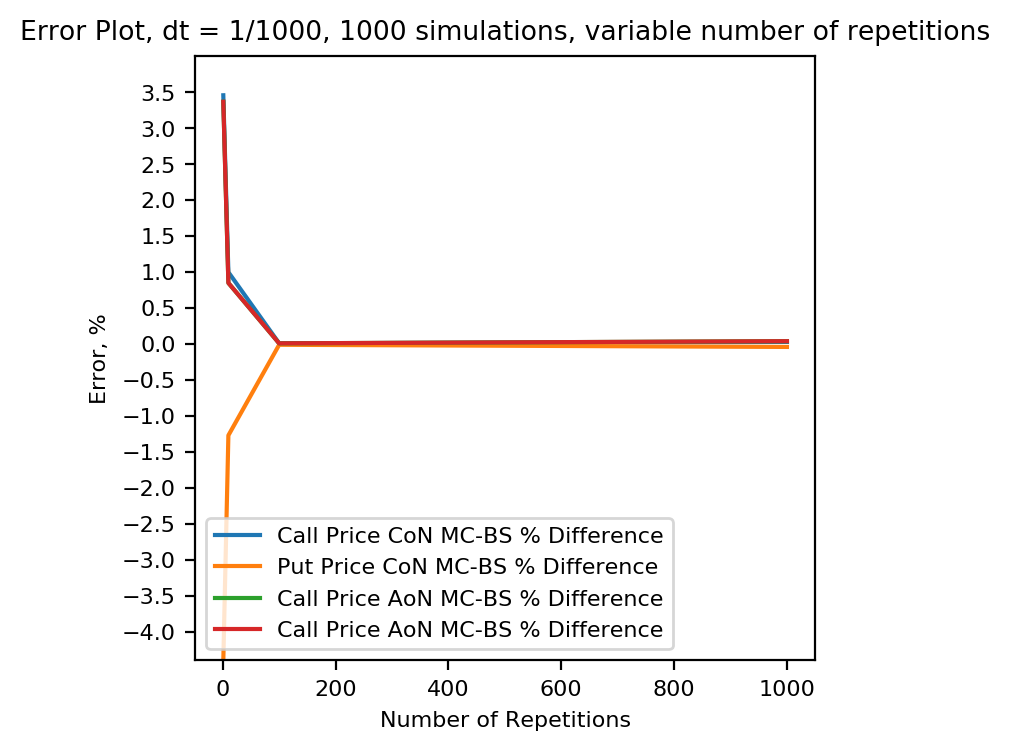

In [700]:
plot_M = optionPrices_M[['Call Price CoN MC-BS % Difference', 'Put Price CoN MC-BS % Difference', 
              'Call Price AoN MC-BS % Difference', 'Put Price AoN MC-BS % Difference', 'Repetitions']]

plt.rcParams["figure.figsize"] = (4,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams.update({'font.size': 8})
plt.plot(plot_M['Repetitions'], plot_M['Call Price CoN MC-BS % Difference'], 
         label= "Call Price CoN MC-BS % Difference")

plt.plot(plot_M['Repetitions'], plot_M['Put Price CoN MC-BS % Difference'], 
         label= 'Put Price CoN MC-BS % Difference')

plt.plot(plot_M['Repetitions'], plot_M['Call Price AoN MC-BS % Difference'], 
         label = 'Call Price AoN MC-BS % Difference')

plt.plot(plot_M['Repetitions'], plot_M['Call Price AoN MC-BS % Difference'],
         label = 'Call Price AoN MC-BS % Difference')

plt.yticks(np.arange(-4, 4, 0.5))
plt.xlabel('Number of Repetitions')
plt.ylabel('Error, %')
plt.ylim(-4.4, 4)
plt.legend(loc="lower left")
plt.title('Error Plot, dt = 1/1000, 1000 simulations, variable number of repetitions')
plt.show()

## 3. Conclusion

In this assignment, we performed the valuation of binary call and put options with various payoff structures using the Monte Carlo method (Euler–Maruyama scheme) and Black-Scholes-Merton framework for verification. It was shown that the Monte Carlo method is a great, very flexible tool to perform option pricing. However, it was found that the current setup requires quite a lot of computations. Therefore, it is likely that there exist (can be found) more stable and quicker methods for binary options. We also confirmed that the Monte Carlo method possesses a computational error that comes from two sources (the granularity of the time-step and the number of simulations). We showed these sources and illustrated the error's convergence to the most significant contributor within the error. Thus, it was found that the Monte Carlo Method is computationally intensive if high precision is required. There is still a big room for further research. For example, it would be interesting to price a binary option also with the American style.